### Part1. 데이터 전처리


데이터를 불러와 전처리하고 토큰화하는 작업입니다.



```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}setInterval(ClickConnect, 1800000)
```



In [69]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
^C


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import tensorflow as tf
from konlpy.tag import Okt
import seaborn as sns
import re
import json
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
train_url = '/content/drive/MyDrive/추천 시스템/train.json'
test_url = '/content/drive/MyDrive/추천 시스템/test.json'
song_meta_url = '/content/drive/MyDrive/추천 시스템/song_meta.json'
genre_gn_all = '/content/drive/MyDrive/추천 시스템/genre_gn_all.json'

with open(train_url, 'r') as f:
  train = json.load(f)
with open(test_url, 'r') as f:
  test = json.load(f)
with open(song_meta_url, 'r') as f:
  song_meta = json.load(f)
with open(genre_gn_all, 'r') as f:
  genre = json.load(f)

train = pd.DataFrame(train)
test = pd.DataFrame(test)
song_meta = pd.DataFrame(song_meta)


# 불용어 사전 
STOP_WORDS = ['가', '을', '를', '이', '에게', '에', '에서', '하는' ,'할', '해', '한', '더', '같은',
              '1', '2', '의', '있', '것', '들', '그', '되', '수', '않', '없', '나', '또', '때',
              '시키', '만들', '지금', '그러', '속', '하나', '모르', '적', '데', '아니', '받', '너',
              '놓', '잘', '원', '좀', '정도', '싶', '이렇', '통하', '중', '따르', '좋', '있는']

# 플레이리스트 제목 토큰화
okt = Okt()
# 전처리 함수
def data_preprocessing(df, STOP_WORDS):
  data = df.copy()
  data.reset_index(inplace=True)
  p = re.compile(r"[^ 0-9a-zA-Z가-힣]+")
  for i in range(data.shape[0]) :
    # 문자 데이터 가공 및 토큰화
    data['plylst_title'][i] = re.sub(p, '', data['plylst_title'][i])
    data['plylst_title'][i] = okt.morphs(data['plylst_title'][i])
  # tag & plylst_title의 키워드를 한곳에 모음
  data['key_words'] = None
  for i in range(data.shape[0]):
    tags = [a for a in data['tags'][i]]
    ply = [a for a in data['plylst_title'][i]]
    keywords = tags + ply
    data['key_words'][i] = keywords
    # 불용어 삭제
    data['key_words'][i] = [word for word in data['key_words'][i] if word not in STOP_WORDS]
  return data

# 묶여있는 음악 value를 각각의 value로 나눔
def song_div(df):
  data = df.copy()
  data = data['songs'].apply(lambda x : pd.Series(x)).stack().reset_index(1, name='song').drop('level_1', axis=1)
  return data

# 묶여있는 키워드 value를 각각의 value로 나눔
def tag_div(df):
  data = df.copy()
  data_list = data['key_words'].apply(lambda x : pd.Series(x)).stack().reset_index(1, name='key_word').drop('level_1', axis=1)
  return data_list

In [4]:
train['is_train'] = 0
test['is_train'] = 1
data_set = pd.concat([train, test])
data_set.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,is_train
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,0
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,0
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,0
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,0
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,0


In [5]:
ds = data_preprocessing(data_set, STOP_WORDS)
ds_tag = tag_div(ds)

<ipython-input-3-6b87473093c6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plylst_title'][i] = re.sub(p, '', data['plylst_title'][i])
<ipython-input-3-6b87473093c6>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plylst_title'][i] = okt.morphs(data['plylst_title'][i])
<ipython-input-3-6b87473093c6>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key_words'][i] = keywords
<ipython-input-3-6b87473093c6>:46: Se

<Figure size 1080x1080 with 0 Axes>

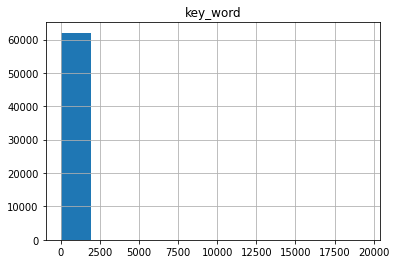

In [6]:
# 키워드의 사용횟수 분포 확인
key_word_cnt = ds_tag['key_word'].value_counts()
key_word_cnt = pd.DataFrame(key_word_cnt)
plt.figure(figsize=(15,15))
key_word_cnt.hist();

In [7]:
# 적게 사용되는 키워드는 삭제
print(key_word_cnt.quantile(0.998))
print(key_word_cnt.quantile(0.998)/train.shape[0])

key_word    1191.88
Name: 0.998, dtype: float64
key_word    0.010358
Name: 0.998, dtype: float64


In [8]:
key_word = key_word_cnt.query('key_word < 1191.88')
stop_words = list(key_word.index)
stopwords = stop_words + STOP_WORDS

In [9]:
ds_ = data_preprocessing(data_set, stopwords)
ds_.head()

<ipython-input-3-6b87473093c6>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plylst_title'][i] = re.sub(p, '', data['plylst_title'][i])
<ipython-input-3-6b87473093c6>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['plylst_title'][i] = okt.morphs(data['plylst_title'][i])
<ipython-input-3-6b87473093c6>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key_words'][i] = keywords
<ipython-input-3-6b87473093c6>:46: Se

,index,tags,id,plylst_title,songs,like_cnt,updt_date,is_train,key_words
0,0,[락],61281,"[여행, 같은, 음악]","[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,0,"[락, 여행, 음악]"
1,1,"[추억, 회상]",10532,"[요즘, 너, 말, 야]","[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,0,"[추억, 회상]"
2,2,"[까페, 잔잔한]",76951,"[편하게, 잔잔하게, 들을, 수, 있는, 곡]","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,0,"[까페, 잔잔한, 곡]"
3,3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,"[크리스마스, 분위기, 에, 흠뻑, 취하, 고, 싶을, 때]","[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,0,"[분위기, 크리스마스, 크리스마스, 분위기]"
4,4,[댄스],27616,"[추억, 의, 노래]","[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,0,"[댄스, 추억, 노래]"


In [10]:
# 노래와 키워드를 개별 값으로 나누어 저장해줌
ds_song = song_div(ds_)
ds_tag = tag_div(ds_)
ds_like_cnt = ds_[['index', 'like_cnt', 'is_train']]

<ipython-input-3-6b87473093c6>:52: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = data['songs'].apply(lambda x : pd.Series(x)).stack().reset_index(1, name='song').drop('level_1', axis=1)
<ipython-input-3-6b87473093c6>:58: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_list = data['key_words'].apply(lambda x : pd.Series(x)).stack().reset_index(1, name='key_word').drop('level_1', axis=1)


In [11]:
# 노래, 키워드, 플레이리스트 좋아요 수를 묶어서 데이터프레임 생성
song_tag_data = ds_like_cnt.join(ds_song)
song_tag_data = song_tag_data.join(ds_tag)
song_tag_data = song_tag_data.reset_index(drop=True).drop(columns='index')
song_tag_data.head()

,like_cnt,is_train,song,key_word
0,71,0,525514.0,락
1,71,0,525514.0,여행
2,71,0,525514.0,음악
3,71,0,129701.0,락
4,71,0,129701.0,여행


In [12]:
song_tag_data_a = song_tag_data.query('is_train == 0')
song_tag_data_b = song_tag_data.query('is_train == 1')

In [13]:
df_train = song_tag_data_a.pivot_table(index='song', columns='key_word', values='like_cnt')
df_train = df_train.fillna(0)
df_test = song_tag_data_b.pivot_table(index='song', columns='key_word', values='like_cnt')
df_test = df_test.fillna(0)
df_train.shape, df_test.shape

((589378, 125), (44659, 99))

In [55]:
train_column_list = set(df_train.columns)
test_column_list = set(df_test.columns)
add_columns = list(train_column_list.difference(test_column_list))
df_test[add_columns] = None
df_test = df_test.fillna(0)
df_test.shape

(44659, 125)

In [56]:
df_test

key_word,EDM,OST,Pop,가사,가요,가을,감성,겨울,곡,공부,...,어울리는,듣고,내,들으면,리스트,싶은,오늘,들어,대,위
song,,,,,,,,,,,,,,,,,,,,,
19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
30.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
54.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707911.0,0.0,0.0,0.0,0.0,0.0,0.0,632.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
707949.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
707965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# df의 값만 따로 저장
X_train = df_train.iloc[:, :].values
X_test = df_test.iloc[:, :].values
BATCH_SIZE = 128
EPOCHS = 10

In [31]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * tf.random.normal(shape=X_train.shape)

## AutoEncoder

**AutoEncoder**  

사용자의 행동(플레이리스트 좋아요)을 통해 가려진 부분을 예측  

  


**input data**  
특정 키워드 혹은 노래가 가려진 형태의 데이터  
**output data**  
가려진 키워드 혹은 노래를 예측한 형태의 데이터


In [43]:
class AE(tf.keras.models.Model):
  def __init__(self, latent_vactor):
    self.latent_vactor = latent_vactor
    super(AE, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(latent_vactor, activation='sigmoid')
    ])
  def call(self, X):
    encoded = self.encoder(X)
    decoded = self.decoder(encoded)
    return decoded

In [44]:
model = AE(latent_vactor=X_train.shape[1])
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [45]:
model.fit(X_train_noisy, X_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
          shuffle=True, validation_split=0.2)

Epoch 1/10
3684/3684 [==============================] - 12s 3ms/step - loss: 93264.8828 - root_mean_squared_error: 305.3932 - val_loss: 97858.5000 - val_root_mean_squared_error: 312.8234
Epoch 2/10
3684/3684 [==============================] - 11s 3ms/step - loss: 93264.9531 - root_mean_squared_error: 305.3929 - val_loss: 97858.5703 - val_root_mean_squared_error: 312.8235
Epoch 3/10
3684/3684 [==============================] - 12s 3ms/step - loss: 93264.9453 - root_mean_squared_error: 305.3931 - val_loss: 97858.9531 - val_root_mean_squared_error: 312.8242
Epoch 4/10
3684/3684 [==============================] - 11s 3ms/step - loss: 93265.4375 - root_mean_squared_error: 305.3939 - val_loss: 97859.6875 - val_root_mean_squared_error: 312.8253
Epoch 5/10
3684/3684 [==============================] - 11s 3ms/step - loss: 93266.6797 - root_mean_squared_error: 305.3958 - val_loss: 97860.5000 - val_root_mean_squared_error: 312.8267
Epoch 6/10
3684/3684 [==============================] - 11s 3ms/s

모델 학습 결과

In [58]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
encoded = model.encoder(X_test).numpy()
decoded = model.decoder(encoded).numpy()
decoded

array([[0.0000000e+00, 9.9938005e-01, 0.0000000e+00, ..., 1.9991255e-17,
        4.9850315e-11, 9.9999970e-01],
       [2.6718736e-16, 1.3599137e-14, 0.0000000e+00, ..., 9.9494106e-01,
        9.7128546e-01, 4.7928229e-15],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [1.1579236e-13, 8.9600559e-21, 0.0000000e+00, ..., 5.4329443e-01,
        4.9768600e-01, 1.3275746e-19],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.8264998e-08, 3.2275913e-18, 0.0000000e+00, ..., 1.6000518e-05,
        8.0493746e-06, 1.6740266e-08]], dtype=float32)

In [60]:
result = pd.DataFrame(data = decoded, index = df_test.index, columns = df_test.columns).fillna(0)
result.head()

key_word,EDM,OST,Pop,가사,가요,가을,감성,겨울,곡,공부,...,어울리는,듣고,내,들으면,리스트,싶은,오늘,들어,대,위
song,,,,,,,,,,,,,,,,,,,,,
19.0,0.000000e+00,9.993801e-01,0.0,1.000000e+00,0.0,5.354178e-07,1.460566e-12,0.919491,9.325032e-26,1.000000,...,0.000000e+00,9.284032e-27,1.192588e-35,0.000000e+00,0.000000e+00,1.017869e-15,1.245941e-01,1.999125e-17,4.985031e-11,9.999997e-01
30.0,2.671874e-16,1.359914e-14,0.0,1.221364e-12,0.0,8.420816e-15,1.939442e-02,0.007766,3.069229e-02,0.156482,...,2.463110e-29,4.140346e-09,5.970728e-05,1.527238e-25,8.530634e-01,6.418758e-18,2.386063e-10,9.949411e-01,9.712855e-01,4.792823e-15
47.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,0.0,1.095075e-05,1.000000e+00,1.000000,1.000000e+00,1.000000,...,0.000000e+00,1.000000e+00,8.817963e-10,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
54.0,3.585598e-13,2.880525e-10,0.0,1.451778e-04,0.0,1.220569e-09,9.321058e-01,0.336754,1.626422e-06,0.417171,...,1.434515e-33,9.782498e-01,2.400130e-11,6.714143e-31,3.562277e-01,1.540954e-05,9.996967e-07,9.654057e-01,4.905508e-01,3.786049e-04
59.0,1.724369e-22,8.868434e-09,0.0,9.957745e-01,0.0,3.087299e-11,6.995092e-02,0.030114,4.581022e-13,0.379073,...,0.000000e+00,9.904135e-01,5.854652e-19,0.000000e+00,2.089731e-12,9.856050e-01,2.540244e-08,1.322015e-05,2.270726e-05,9.333575e-01


**가장 많이 사용된 단어 찾기**

In [61]:
key_word_count = song_tag_data['key_word'].value_counts()
key_word_count = key_word_count.sort_values(ascending=False)
key_word_count.head()

노래      984370
감성      938971
기분전환    832997
발라드     755535
드라이브    623287
Name: key_word, dtype: int64

**드라이브**라는 키워드를 검색했을 때, 나오는 결과

In [62]:
drive_keyword = result['드라이브']
drive_keyword = drive_keyword.sort_values(ascending=False)
drive_keyword.head()

song
147570.0    2.618750e-09
392397.0    6.504377e-10
33093.0     1.514266e-10
164509.0    7.917117e-11
265827.0    7.917117e-11
Name: 드라이브, dtype: float32

In [63]:
drive_keyword_result = song_meta.query('id == 147570 or id == 392397 or id == 33093 or id == 164509 or id == 265827')
drive_keyword_result

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
33093,"[GN2502, GN2501, GN0101]",20180402,Positive,10153912,[1201990],보낼 수밖에,"[GN2500, GN0100]",[펜타곤],33093
147570,"[GN1806, GN1801]",20151120,A Long Walk,2651829,[915757],달빛 호숫가에서,[GN1800],[피아노 포레스트],147570
164509,"[GN1806, GN1801]",20080307,The Ultimate Andre Gagnon,372823,[2808],L`amour Reve,[GN1800],[Andre Gagnon],164509
265827,[GN1801],20170530,사랑은,10066400,[1757899],사랑은,[GN1800],[로지],265827
392397,"[GN0104, GN1501, GN0101, GN1504]",20080416,다섯남자와 아기천사 OST,376290,[243303],고칠게,"[GN1500, GN0100]",[진원],392397
